# Project: <span style="color:red">No-show appointments</span>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## <span style='color:#21A8F3'>Introduction</span>

Hi, ✋\
In this project I will be investigating **No-show appointments** data set.\
The dataset has a collection of information from 100k medical appointments in Brazil and is focused on the questions whether or not patients show up on their appointments.
> **The walkthrough**\
> In this project I will be:
> * Showing the data.
> * Cleaning the data.
> * Making it ready to answer some questions:
    #### Q1) Does people who received an SMS showed up on their appointments more than who didn't?
    #### Q2) Does poeple who don't have Hipertension, Diabetes, Alcoholism or Handcap showed up on their appointments more than who have one of these?
    #### Q3) Does poeple who have Scholarship showed up on their appointments more than who don't?
    #### Q4) Is gender or age matter?
    #### Q5) Is there a neighbourhood that peeple show up on their appointment more than the others?

In [3]:
# Importing needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## <span style='color:#21A8F3'>Data Wrangling</span>

### General Properties

<span style='font-size:larger'>Just a warm up to just look at the dataset and its details before we dive into exploring and analysis the data.</span>

In [4]:
# Reading the csv file

df = pd.read_csv('KaggleV2-May-2016.csv')

In [5]:
# Showing some raw data

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


This is the over view of the dataset.

In [6]:
# Showing information about the data (dtyes, num of columns, num of rows, ...etc)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


there are **14** columns wiht **110527** rows and there is some information about each column to help us in our analysis.

In [7]:
# Showing a short describtion of each column of the dataset

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


hmm, we have known alot of information here like the the maximun value of the columns, the minumun, ...etc.

In [8]:
# Number of unique values

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

This is the number of unique values in each column.

In [9]:
# Start and the end of this dataset

print(df.AppointmentDay.min())
print(df.AppointmentDay.max())

2016-04-29T00:00:00Z
2016-06-08T00:00:00Z


The timeline of the dataset is about only a month.\
I did this to know how valueble this dataset and how much will give us results.

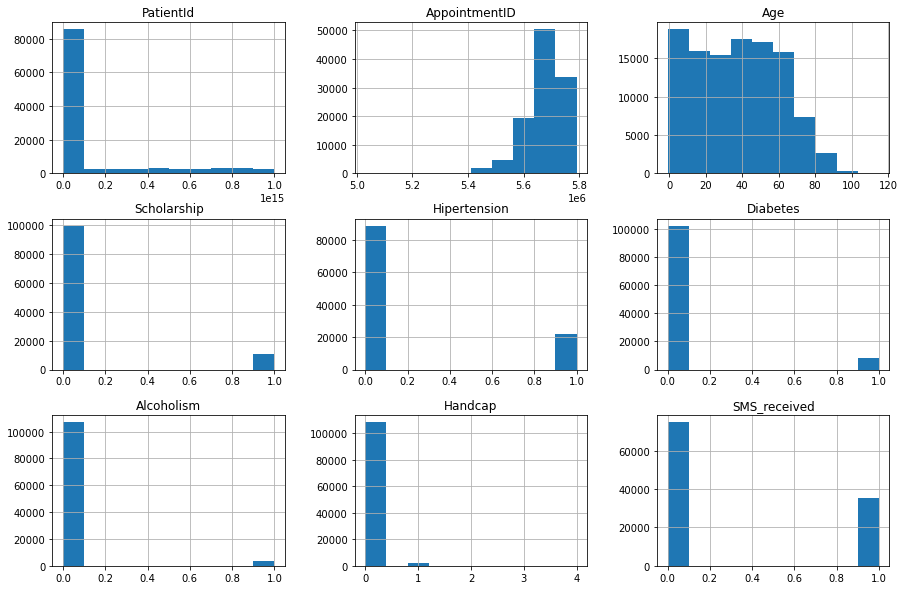

In [10]:
# Lets look at the histogram of each column

df.hist(figsize=(15, 10));

hmm, it seems that there are many people that don't have **Scholarship**, **Hipertension**, **Diabetes**, **Alcoholism** or **Handcap**.
And there were many people that didn't recieve **SMS**.\
<span style='color:#7C2BE1'>Note</span> *Scholarship* idicates whether or not the patient is enrolled in "Brasilian welfare program".

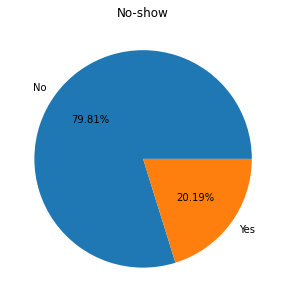

In [11]:
# Specifing two sets of which the patient showed up or not

did_show_up = df['No-show'] == 'No'
didnot_show_up = df['No-show'] == 'Yes'
plt.figure(figsize=(5, 5))
plt.pie(df['No-show'].value_counts(), labels=df['No-show'].value_counts().index, autopct='%0.2f%%')
plt.title('No-show');

It seems that there are about *20%* of people who didn't show up on their appointments.

#### Check the cleanliness of the data

<span style='font-size:larger'>We check if there are missing values or duplicate rows in the data so that we can clean it an make it ready for our analysis.</span>

In [12]:
# Checking if there are NaN values

df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [13]:
# Checking for duplicated rows

df.duplicated().sum()

0

As we saw, there isn't a *Nan* value or a *duplicate row* in the dataset,\
so the dataset is ready to do some analysis on it and try to answer those needed questions.

<a id='eda'></a>
## <span style='color:#21A8F3'>Exploratory Data Analysis</span>
<!-- ### Research Question 1 (Replace this header name!) -->

<span style='font-size:larger'>In this section I will do some analysis to help answering the previous questions.</span>

### Q1) Does people who received an SMS showed up on their appointments more than who didn't?

In [14]:
# Defining a function that analyse the wanted column with 'No-show' column (just to make the code easier)

def analyse(x):
    """This function checks if y is a column in the dataset and drawing a bar chart with the 'No'show' column.
    arg (x): the wanted column i want to compare with the 'No-show' column.
    """
    col = df.columns
    if x not in col:
        print(f"'{x}' is not a column")
    else:
        df[x][did_show_up].hist(alpha=0.5, label='Showed up')
        df[x][didnot_show_up].hist(alpha=0.5, label="Didn't show up")
        plt.title(f'{x} and Show/No-show on appointments')
        plt.xlabel(x)
        plt.ylabel('Count of appointments')
        plt.legend();

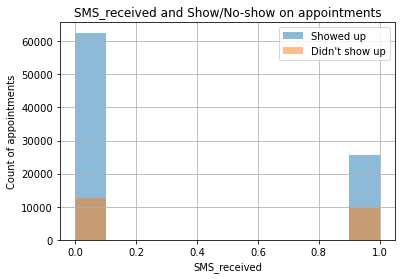

In [15]:
# Analysing 'SMS_received'

analyse('SMS_received')

### Q2) Does poeple who don't have Hipertension, Diabetes, Alcoholism or Handcap showed up on their appointments more than who have one of these?

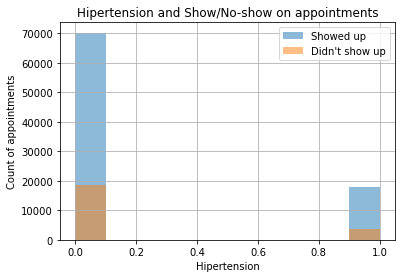

In [16]:
# Analysing 'Hipertension'

analyse('Hipertension')

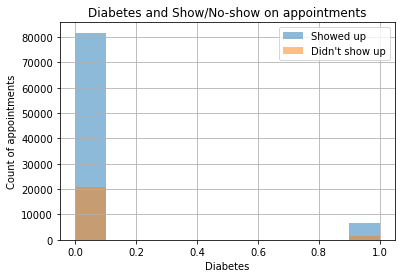

In [17]:
# Analysing 'Diabetes'

analyse('Diabetes')

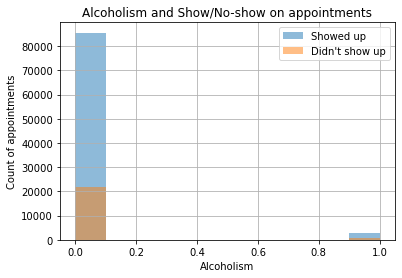

In [18]:
# Analysing 'Alcoholism'

analyse('Alcoholism')

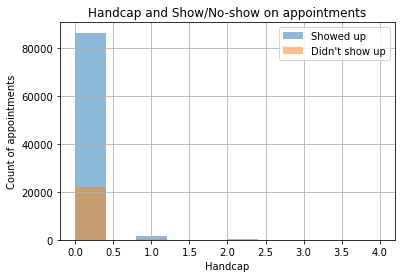

In [19]:
# Analysing 'Handcap'

analyse('Handcap')

### Q3) Does poeple who have Scholarship showed up on their appointments more than who don't?

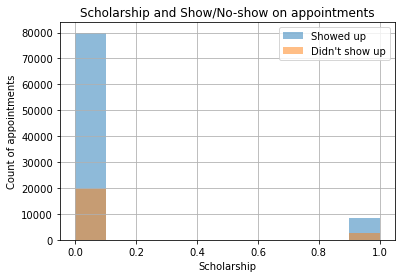

In [20]:
# Analysing 'Scholarship'

analyse('Scholarship')

### Q4) Is gender or age matter?

F    71840
M    38687
Name: Gender, dtype: int64


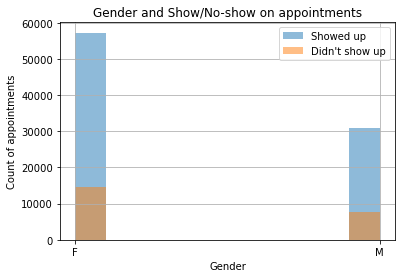

In [21]:
# Analysing 'Gender'

# Counts of each gender
print(df['Gender'].value_counts())

analyse('Gender')

In [22]:
# Analysing 'Age'

# the mean age of people who showed up
int(df.Age[did_show_up].mean())

37

In [23]:
# the mean age of people who showed up
int(df.Age[didnot_show_up].mean())

34

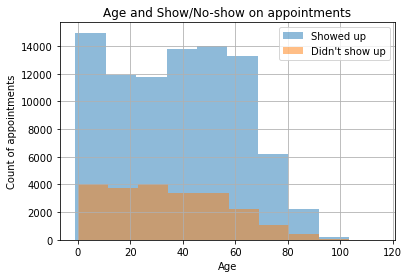

In [24]:
analyse('Age')

### Q5) Is there a neighbourhood that peeple show up on their appointment more than the others?

In [25]:
# Analysing 'Neighbourhood'

neighbourhood = df.groupby('Neighbourhood')['No-show'].count() # grouping the neighbourhood column with the counts of appointments
print(neighbourhood)

print('_' * 30)
# Max appointments
print('Max appointments...')
print(neighbourhood[neighbourhood == neighbourhood.max()])

print('-' * 30)
# Min appointments
print('Min appointments...')
print(neighbourhood[neighbourhood == neighbourhood.min()])

Neighbourhood
AEROPORTO                 8
ANDORINHAS             2262
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
                       ... 
SÃO JOSÉ               1977
SÃO PEDRO              2448
TABUAZEIRO             3132
UNIVERSITÁRIO           152
VILA RUBIM              851
Name: No-show, Length: 81, dtype: int64
______________________________
Max appointments...
Neighbourhood
JARDIM CAMBURI    7717
Name: No-show, dtype: int64
------------------------------
Min appointments...
Neighbourhood
PARQUE INDUSTRIAL    1
Name: No-show, dtype: int64


In [26]:
did_show_up_df = df[df['No-show'] == 'No'] # seperating a df that only contanis the showed up appointments
didnot_show_up_df = df[df['No-show'] == 'Yes'] # seperating a df that only contanis the didn't showed up appointments

neighbourhood = did_show_up_df.groupby('Neighbourhood')['No-show'].count()
# Max showed up appointments
print('Max showed up appointments...')
print(neighbourhood[neighbourhood == neighbourhood.max()])

print('-' * 30)
# Min showed up appointments
print('Min showed up appointments...')
print(neighbourhood[neighbourhood == neighbourhood.min()])

print('_' * 30)

neighbourhood = didnot_show_up_df.groupby('Neighbourhood')['No-show'].count()
# Max didn't show up appointments
print('Max didn\'t show up appointments...')
print(neighbourhood[neighbourhood == neighbourhood.max()])

print('-' * 30)
# Min didn't show up appointments
print('Min didn\'t show up appointments...')
print(neighbourhood[neighbourhood == neighbourhood.min()])


Max showed up appointments...
Neighbourhood
JARDIM CAMBURI    6252
Name: No-show, dtype: int64
------------------------------
Min showed up appointments...
Neighbourhood
PARQUE INDUSTRIAL    1
Name: No-show, dtype: int64
______________________________
Max didn't show up appointments...
Neighbourhood
JARDIM CAMBURI    1465
Name: No-show, dtype: int64
------------------------------
Min didn't show up appointments...
Neighbourhood
AEROPORTO    1
Name: No-show, dtype: int64


In [27]:
# Percentage of showed up people

total_appointments_per_N = df.groupby('Neighbourhood')['No-show'].count()
total_shows_per_N = did_show_up_df.groupby('Neighbourhood')['No-show'].count()
percentage = (total_shows_per_N / total_appointments_per_N) * 100

# Neighbourhood that have the highest percentage for people to show up
print(percentage[percentage == percentage.max()])

print('-' * 30)
# Neighbourhood that have the lowest percentage for people to show up
print(round(percentage[percentage == percentage.min()]), 2)

Neighbourhood
PARQUE INDUSTRIAL    100.0
Name: No-show, dtype: float64
------------------------------
Neighbourhood
SANTOS DUMONT    71.0
Name: No-show, dtype: float64 2


<a id='conclusions'></a>
## <span style='color:#21A8F3'>Conclusions</span>

 ### <span style='color:red'>**!**</span> Limitations 

<span style='font-size:larger'>Before I summarize the conclusions, I would like to say the limitations of this research that Faced me:</sapn>
> * As we saw, the dataset is only about only a month from the first appointment day to the last one which make this data is very Limited, so the results are not that accurate.
> * If there is a column for the '**Doctor's name**' or '**Doctor's specialty**' I think we will get a better results like for example:(if there is a doctor that people show up on their appointments with him, this means that this doctor is clever ,or if there is some sort of disease that isn't that dangerous, so people don't show up).
> * Also if there is a '**Price**' column will indecates if the appointment is so expensive so that people leave this Nighbourhood and decide to go to anothor doctor that has a cheaper appointment cost may be 🤷‍♂️
> * Also there may be other reasons for person to not show up. Like for example something happened to the person who has an appointment and that thing made him not able to attend the appointment. But of course we could avoid this if we have enough data which will make the percentage of this probability decrease so much so that we don't consider this in mind.

---

<span style='font-size:larger'>Finally, after the research of the main question "*What makes people don't show up for their appointments?*" I have discoverd some interesting information from the analysis I did any here they are arranged in the order of the questions asked:</span>
#### <span style='color:#7C2BE1'>**1.**</span> People who didn't recive an **SMS** showed up on their appointments more than who recived one.
#### <span style='color:#7C2BE1'>**2.**</span> People who don't have **Hipertension**, **Diabetes**, **Alcoholism** or **Handcap** showed up on their appointments really more than who have at least one of those.
#### <span style='color:#7C2BE1'>**3.**</span> People who don't have **Scholarship** (enrolled in "*Brasilian welfare program*") showed up no their appointments more than who have it.
#### <span style='color:#7C2BE1'>**4.**</span> It seems like **females** showed up on their appointments more than **males**.
#### <span style='color:#7C2BE1'>**5.**</span> The average age of people who showed up is **37** and the average age of people who didn't is **34**, and it seems like younger people showed up for their appointments more than older people.
#### <span style='color:#7C2BE1'>**6.**</span> For the **Neighbourhood**:
* 'JARDIM CAMBURI' has the most appointments of 7717 appointments, the most showed up appointments of 6252 appointmens and the most didn't show up appointmens of 1467 appointments.
* 'PARQUE INDUSTRIAL' has the least aapointmenst of 1 appointments, the least showed up appointments of 1 appointment and the highest percentage of showed up appointments of **100%**.
* 'AEROPORTO' has the least didn't show up appointments of 1 appointments.
* 'SANTOS DUMONT' has the least percentage of showed up appointments of **71%**.